In [1]:
import csv
import numpy as np
import ROOT as rt
from glob import glob
from histo_utilities import create_TH1D, create_TH2D
import os

import uproot
donotdelete = []

Welcome to JupyROOT 6.22/08


In [56]:
f = {}
calibration = {}
# f['output'] = '/Users/christinawang/Desktop/Caltech/Research/DM/data/20210309/output_runAll_converted.root'
date = '20210927'
# f['coincidence'] = '/Users/christinawang/Desktop/Caltech/Research/DM/data/hpge/'+date+'/output_Co57_coincidence_run1-116_converted.root'

if date == '20210903':
    f['coincidence'] = '/Users/christinawang/Desktop/Caltech/Research/DM/data/hpge/'+date+'/output_Co57_coincidence_run1-145_converted.root'


if date == '20210904':
    f['coincidence'] = '/Users/christinawang/Desktop/Caltech/Research/DM/data/hpge/'+date+'/output_Co57_coincidence_run1-116_converted.root'
if date == '20210905':
    f['coincidence'] = '/Users/christinawang/Desktop/Caltech/Research/DM/data/hpge/'+date+'/output_Co57_coincidence_run1-83_converted.root'
if date == '20210907':
    f['coincidence'] = '/Users/christinawang/Desktop/Caltech/Research/DM/data/hpge/'+date+'/output_Co57_coincidence_run1-61_converted.root'
if date == '20210908':
    f['coincidence'] = '/Users/christinawang/Desktop/Caltech/Research/DM/data/hpge/'+date+'/output_Co57_coincidence_run1-185_converted.root'

if date == '20210917':
    f['coincidence'] = '/Users/christinawang/Desktop/Caltech/Research/DM/data/hpge/'+date+'/output_Co57_coincidence_run1-264_converted.root'
if date == '20210920':
    f['coincidence'] = '/Users/christinawang/Desktop/Caltech/Research/DM/data/hpge/'+date+'/output_Co57_coincidence_run1-63_converted.root'

if date == '20210921':
    f['coincidence'] = '/Users/christinawang/Desktop/Caltech/Research/DM/data/hpge/'+date+'/output_Co57_coincidence_run1-46_converted.root'


if date == '20210924':
    f['coincidence'] = '/Users/christinawang/Desktop/Caltech/Research/DM/data/hpge/'+date+'/output_Co57_coincidence_run1-53_converted.root'

if date == '20210925':
    f['coincidence'] = '/Users/christinawang/Desktop/Caltech/Research/DM/data/hpge/'+date+'/output_Co57_coincidence_run1-75_converted.root'

if date == '20210927':
    f['coincidence'] = '/Users/christinawang/Desktop/Caltech/Research/DM/data/hpge/'+date+'/output_Co57_coincidence_run1-67_converted.root'







plot_path = '/Users/christinawang/Desktop/Caltech/Research/DM/plots/'+date
if not os.path.isdir(plot_path):os.makedirs(plot_path)

#20210830 from gaus_amp to energy
# calibration['target'] = [0.063, 3.526] #p1, p0 / slope, y-intercept
# calibration['tag'] = [0.056, 4.091] #p1, p0 / slope, y-intercept

#20210906 calibration, for data starting on 20210903
calibration['target'] = [0.03117, 0.028 ] #p1, p0 / slope, y-intercept
calibration['tag'] = [0.0582, 0.025] #p1, p0 / slope, y-intercept


tree = {}
h = {}
gaus_amp = {}
time = {}
baseline_RMS = {}
baseline = {}
gaus_sigma = {}
for k,v in f.items():
    print (k, v)
    root_dir = uproot.open(v) 

    tree[k] = root_dir['pulse']
    
    gaus_amp[k] = np.array(tree[k]["gaus_amp"])
    baseline_RMS[k] = np.array(tree[k]["baseline_RMS"])
   
    baseline[k] = np.array(tree[k]["baseline"])
    time[k] = np.array(tree[k]["gaus_mean"])
    gaus_sigma[k] = np.array(tree[k]["gaus_sigma"]) # in ns


    gaus_amp[k][:,0] = gaus_amp[k][:,0]*calibration['target'][0]+calibration['target'][1]
    gaus_amp[k][:,2] = gaus_amp[k][:,2]*calibration['tag'][0]+calibration['tag'][1]
    print(gaus_amp[k].shape)

coincidence /Users/christinawang/Desktop/Caltech/Research/DM/data/hpge/20210927/output_Co57_coincidence_run1-67_converted.root
(6700, 3)


In [57]:
def peak_finding(hist, k):
    SS = rt.TSpectrum()
    n_pks = SS.Search(hist, 0.1, "", 0.02)
    x_pos = SS.GetPositionX()
    y_pos = SS.GetPositionY()
    pks = []
    print( "#############################################")
    print ("Number of peaks for " + k + ":", n_pks)
    for j in range(n_pks):
        n_pk = hist.FindBin(x_pos[j])
        if j == 0:
            thr = 0.7 * hist.GetBinContent(n_pk)
        else:
            thr = 0.7 * hist.GetBinContent(n_pk)
        n_low = n_pk
        while hist.GetBinContent(n_low) > thr:
            n_low -= 1
        x_low = hist.GetBinCenter(n_low)    
        n_up = n_pk
        while hist.GetBinContent(n_up) > thr:
            n_up += 1
        x_up = hist.GetBinCenter(n_up)
        r = hist.Fit('gaus', 'LRSQ+', '', x_low, x_up)
        r = r.Get()
        print( 'Fit p-val = {:.2f}'.format(r.Prob()))
        print('number in MeV',r.Parameter(1), r.Parameter(2))
    print( "#############################################")




/usr/local/lib/python3.9/site-packages/root_numpy/_hist.py:75: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return _librootnumpy.fill_h1(
/usr/local/lib/python3.9/site-packages/root_numpy/_hist.py:75: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for addi

0 67.0
2 67.0
Sum 67.0
#############################################
Number of peaks for channel 0: 6
Fit p-val = 0.50
number in MeV 6.723747248004387 1.6810204303897023
Fit p-val = 0.75
number in MeV 19.648023634675837 3.637484739044171
Fit p-val = 0.00
number in MeV 59.009231559666 6.743495761743043e-07
Fit p-val = 0.82
number in MeV 87.00000000000001 1.6463478154969708
Fit p-val = 1.00
number in MeV 76.0 0.6930291973987646
Fit p-val = 0.00
number in MeV 65.00010237042207 0.09818535276584578
#############################################
#############################################
Number of peaks for channel 2: 5
Fit p-val = 0.81
number in MeV 129.45597736032713 2.064288769323197
Fit p-val = 0.00
number in MeV 71.0001024943017 0.09831697663486572
Fit p-val = 0.82
number in MeV 49.0 1.6463464392168083
Fit p-val = 1.00
number in MeV 60.00000000000054 0.6930291974810442
Fit p-val = 1.00
number in MeV 78.0 0.6930286164937787
#############################################


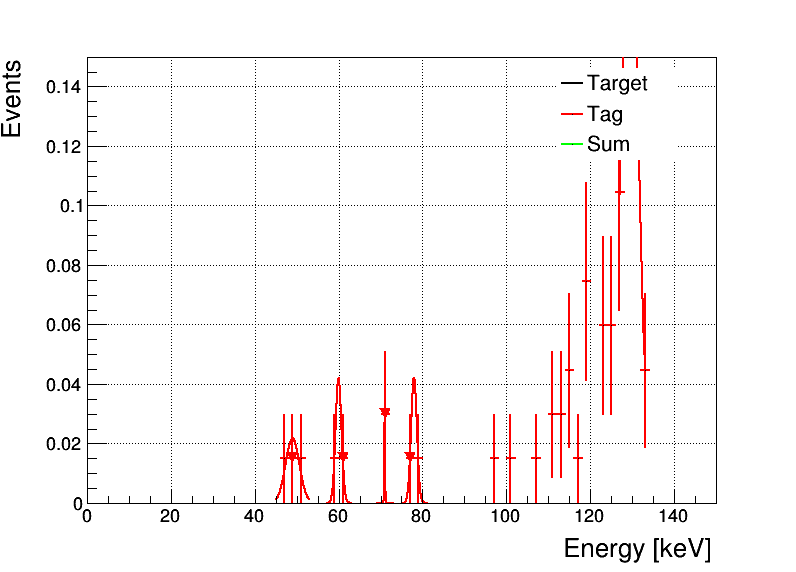

In [59]:
rt.gStyle.SetOptStat(0)

channel = [0,2]
legend = ['Target', 'Tag']
c = rt.TCanvas('c_spectrum', 'c_spectrum', 800, 600)
h = {}
#rt.gStyle.SetOptFit(000002200)
# rt.gStyle.SetOptFit(000002200)
# rt.gStyle.SetTitleSize(0.8)
leg = rt.TLegend(0.7,0.72,0.85,0.88)
# leg = rt.TLegend(0.2,0.72,0.35,0.88)
leg.SetTextSize(0.04)
k = 'coincidence'

leg.SetBorderSize(0)
bins = [75,0,150]
for i, ch in enumerate(channel):
#     if ch == 2:continue

    cond = np.abs(gaus_sigma[k][:,2]/1000-6)<0.5
    cond = np.logical_and(cond, np.abs(time[k][:,0]-time[k][:,2])/1000 < 5)
    cond = np.logical_and(cond, baseline_RMS[k][:,0]<24)
    cond = np.logical_and(cond, np.abs(gaus_amp['coincidence'][:,0]+gaus_amp['coincidence'][:,2]-136)<1)

#     cond = np.logical_and(cond, np.abs(gaus_amp['coincidence'][:,2]-106)<3)




    h[str(ch)] = create_TH1D(gaus_amp['coincidence'][:,ch][cond], binning = bins,axis_title = ['Energy [keV]', 'Events'])



h['Sum'] = create_TH1D(gaus_amp['coincidence'][:,0][cond]+gaus_amp['coincidence'][:,2][cond], binning = bins,axis_title = ['Energy [keV]', 'Events'])

for i, k in enumerate(h.keys()):

    h[k].SetTitle('')

    if k == '0': leg.AddEntry(h[k],'Target')
#     elif k == '0cond': leg.AddEntry(h[k],'Target with cuts')
    elif k == '2': leg.AddEntry(h[k],'Tag')
#     elif k == '2cond': leg.AddEntry(h[k],'Tag with cuts')
    else: leg.AddEntry(h[k],k)


    v = h[k].Clone()
#     h[ch].SetMaximum(10)
    h[k].SetLineColor(i+1)
    h[k].SetLineWidth(2)
    print(k, h[k].Integral())


    h[k].GetXaxis().SetTitleSize(0.05)
    h[k].GetYaxis().SetTitleSize(0.05)


    h[k].Scale(1./h[k].Integral())
#     peak_finding(h['2'],"channel "+str(2))

    h[k].SetMaximum(0.15)


    h[k].DrawCopy('hist' if i == 0 else 'hist same')




peak_finding(h['0'],"channel "+str(0))

peak_finding(h['2'],"channel "+str(2))

# peak_finding(h['Sum'],"sum")





leg.Draw()
c.SetLeftMargin(0.11)
c.SetBottomMargin(0.12)


# c.SetLogy()
c.SetGrid()
c.Draw()

# peak_finding(test,'sum')






c.SaveAs(plot_path+'/energy.png')

# 2d correlation

/usr/local/lib/python3.9/site-packages/root_numpy/_hist.py:70: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return _librootnumpy.fill_h2(
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_spectrum
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Info in <TCanvas::Print>: png file /Users/christinawang/Desktop/Caltech/Research/DM/plots/202109272d_correlation.png has been created


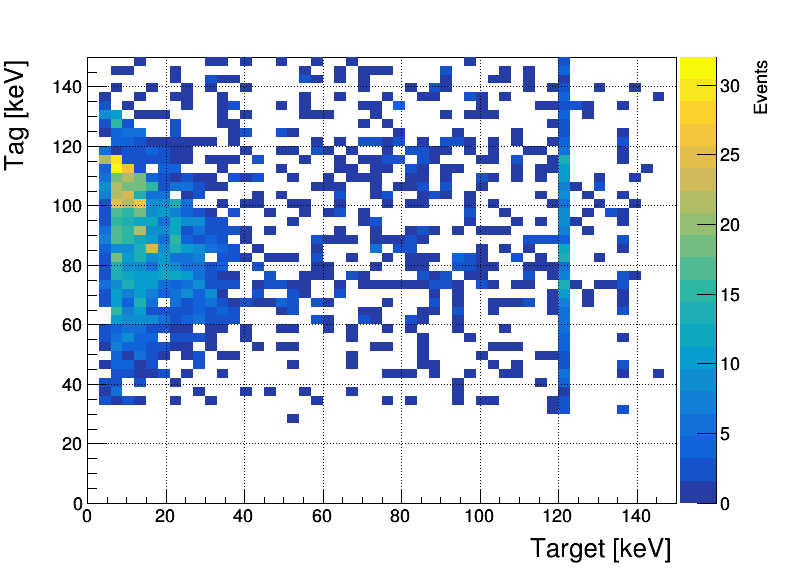

In [45]:
channel = [0,2]
legend = ['DUT', 'tag']
c = rt.TCanvas('c_spectrum', 'c_spectrum', 800, 600)
rt.gStyle.SetOptStat(0)
# rt.gStyle.SetOptFit(000002200)
# rt.gStyle.SetTitleSize(0.8)
leg = rt.TLegend(0.75,0.8,0.9,0.9)
leg = rt.TLegend(0.2,0.8,0.4,0.88)

leg.SetBorderSize(0)
k = 'coincidence'
# cond = np.logical_and(np.abs(gaus_sigma[k][:,0]/1000-6)<0.5, np.abs(gaus_sigma[k][:,2]/1000-6)<0.5)

# cond = np.logical_and(cond, np.abs(time[k][:,0]-time[k][:,2])/1000 < 0.5)

# cond = np.logical_and(cond, baseline_RMS[k][:,0]<24)

cond = np.abs(gaus_sigma[k][:,2]/1000-6)<0.5
cond = np.logical_and(cond, np.abs(time[k][:,0]-time[k][:,2])/1000 < 5)
cond = np.logical_and(cond, baseline_RMS[k][:,0]<24)
h = create_TH2D(np.column_stack((gaus_amp[k][:,0][cond], gaus_amp[k][:,2][cond])), binning = [50,0,150,50,0,150],\
                axis_title = ['Target [keV]','Tag [keV]', 'Events'])
# h = create_TH2D(np.column_stack((integral[0], integral[2])), binning = [50,0,1.5,50,0,1.5],axis_title = ['DUT [MeV]','tag [MeV]', 'Events'])


h.GetYaxis().SetTitleSize(0.05)
h.GetXaxis().SetTitleSize(0.05)

h.SetTitle('')
# h = create_TH2D(np.column_stack(((t_15[0]-t_15[2])[cond], (t_45[0]-t_45[2])[cond])), binning = [50,-10,10,50,-10,10],axis_title = ['15','75', 'Events'])


h.DrawCopy('colz')
c.SetLeftMargin(0.11)

c.SetRightMargin(0.15)

c.SetBottomMargin(0.12)


# c.SetLogz()
c.SetGrid()
c.Draw()
c.SaveAs(plot_path+'2d_correlation.png')

# plot time difference for random coincidence

/usr/local/lib/python3.9/site-packages/root_numpy/_hist.py:75: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return _librootnumpy.fill_h1(
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_spectrum
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Info in <TCanvas::Print>: png file /Users/christinawang/Desktop/Caltech/Research/DM/plots/20210920time0-time2.png has been created


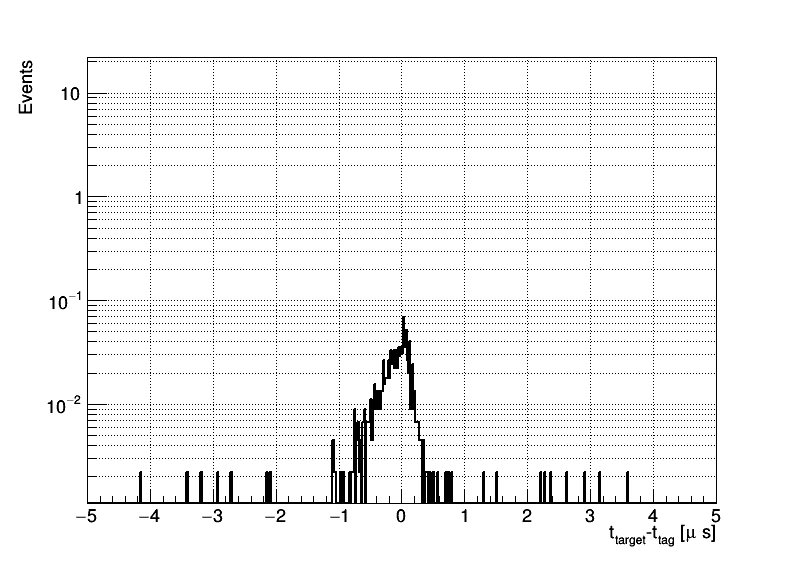

In [77]:
channel = [0,2]
legend = ['DUT', 'tag']
c = rt.TCanvas('c_spectrum', 'c_spectrum', 800, 600)
#rt.gStyle.SetOptFit(000002200)
# rt.gStyle.SetOptFit(000002200)
# rt.gStyle.SetTitleSize(0.8)
leg = rt.TLegend(0.75,0.8,0.9,0.9)
leg = rt.TLegend(0.6,0.7,0.8,0.88)
leg.SetTextSize(0.05)
h = {}
leg.SetBorderSize(0)


bins = [200,-200,200]

bins = [500,-5,5]
k = 'coincidence'
cond = np.logical_and(gaus_amp[k][:,0]>0, gaus_amp[k][:,2]>0)
cond = np.logical_and(np.abs(gaus_sigma[k][:,0]/1000-6)<0.5, np.abs(gaus_sigma[k][:,2]/1000-6)<0.5)

cond = np.logical_and(np.abs(gaus_sigma[k][:,0]/1000-6)<0.5, np.abs(gaus_sigma[k][:,2]/1000-6)<0.5)

cond = np.logical_and(cond, np.abs(time[k][:,0]-time[k][:,2])/1000 < 0.5)



# cond = np.logical_and(cond, np.logical_and(baseline_RMS[k][:,0]<20, baseline_RMS[k][:,2]<20))
# cond = np.logical_and(cond, baseline[k][:,0]>-10)

cond =  np.abs(gaus_amp['coincidence'][:,0]+gaus_amp['coincidence'][:,2]-122)<1
cond = np.logical_and(cond, np.abs(gaus_sigma[k][:,2]/1000-6)<0.5)

h['ch'] = create_TH1D((time['coincidence'][:,0]-time['coincidence'][:,2])[cond]/1000, binning = [500,-5,5],axis_title = ['t_{target}-t_{tag} [#mu s]', 'Events'])





for i, k in enumerate(h.keys()):
    h[k].SetLineWidth(2)
    h[k].SetLineColor(i+1)
    leg.AddEntry(h[k], k)
    h[k].SetMaximum(10000)
#     h[k].SetMinimum(0.1)
    h[k].SetTitle('')
    
    h[k].DrawNormalized('same')
    v = h[k]

#     SS = rt.TSpectrum()
#     n_pks = SS.Search(v, 0.1, "", 0.02)
#     x_pos = SS.GetPositionX()
#     y_pos = SS.GetPositionY()
#     pks = []
#     print (n_pks)
#     for i in range(n_pks):
#         n_pk = v.FindBin(x_pos[i])
#         if i == 0:
#             thr = 0.4 * v.GetBinContent(n_pk)
#         else:
#             thr = 0.4 * v.GetBinContent(n_pk)
#         n_low = n_pk
#         while v.GetBinContent(n_low) > thr:
#             n_low -= 1
#         x_low = v.GetBinCenter(n_low)    
#         n_up = n_pk
#         while v.GetBinContent(n_up) > thr:
#             n_up += 1
#         x_up = v.GetBinCenter(n_up)
#         r = v.Fit('gaus', 'LRSQ+', '', x_low, x_up)
#         r = r.Get()
#         print( 'Fit p-val = {:.2f}'.format(r.Prob()))
#         print('number in nVs',r.Parameter(1), r.Parameter(2))


# leg.Draw()
c.SetLeftMargin(0.11)
c.SetBottomMargin(0.12)


c.SetLogy()
c.SetGrid()
c.Draw()
c.SaveAs(plot_path+'time0-time2.png')


# plot other branches

/usr/local/lib/python3.9/site-packages/root_numpy/_hist.py:75: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return _librootnumpy.fill_h1(
/usr/local/lib/python3.9/site-packages/root_numpy/_hist.py:75: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for addi

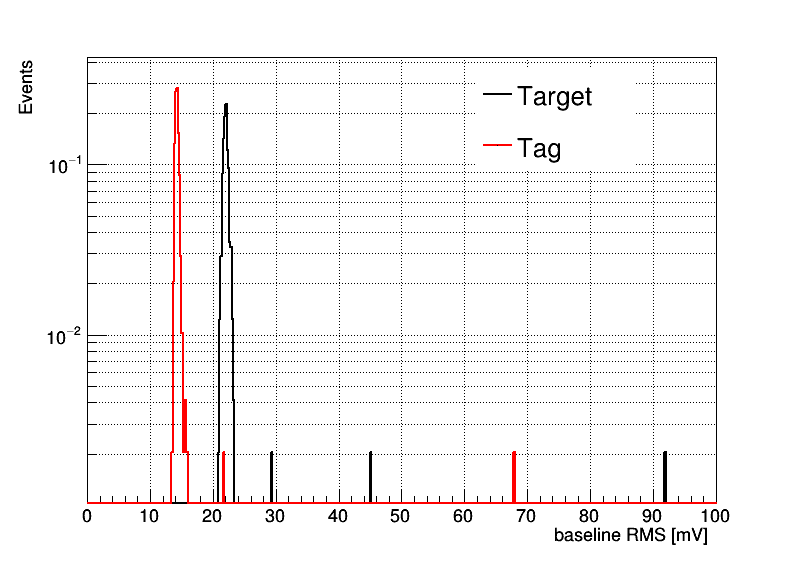

In [71]:
channel = [0,2]
legend = ['DUT', 'tag']
c = rt.TCanvas('c_spectrum', 'c_spectrum', 800, 600)
#rt.gStyle.SetOptFit(000002200)
# rt.gStyle.SetOptFit(000002200)
# rt.gStyle.SetTitleSize(0.8)
leg = rt.TLegend(0.75,0.8,0.9,0.9)
leg = rt.TLegend(0.6,0.7,0.8,0.88)
leg.SetTextSize(0.05)
h = {}
leg.SetBorderSize(0)


bins = [200,-200,200]

bins = [500,-5,5]
k = 'coincidence'
cond = np.logical_and(np.abs(gaus_sigma[k][:,0]/1000-6)<0.5, np.abs(gaus_sigma[k][:,2]/1000-6)<0.5)

cond = np.logical_and(cond, np.abs(time[k][:,0]-time[k][:,2])/1000 < 0.5)

cond = np.logical_and(cond, baseline_RMS[k][:,0]<24)

cond =  np.abs(gaus_amp['coincidence'][:,0]+gaus_amp['coincidence'][:,2]-122)<1
cond = np.logical_and(cond, np.abs(gaus_sigma[k][:,2]/1000-6)<0.5)


# cond = np.logical_and(cond, np.logical_and(baseline_RMS[k][:,0]<20, baseline_RMS[k][:,2]<20))
# cond = np.logical_and(cond, baseline[k][:,0]>-10)
for ch in [0,2]:

    h[str(ch)] = create_TH1D(baseline_RMS['coincidence'][:,ch][cond], binning = [500,0,100],axis_title = ['baseline RMS [mV]', 'Events'])

#     h[str(ch)] = create_TH1D(baseline['coincidence'][:,ch], binning = [500,0,20],axis_title = ['baseline [mV]', 'Events'])

#     h[str(ch)] = create_TH1D(gaus_sigma['coincidence'][:,ch][cond]/1000, binning = [100,-1,20],axis_title = ['gaus sigma [#mu s]', 'Events'])



# h['ch'] = create_TH1D((time['coincidence'][:,0]-time['coincidence'][:,2])/1000, binning = [1000,-20,20],axis_title = ['time [#mu s]', 'Events'])



for i, k in enumerate(h.keys()):
    h[k].SetLineWidth(2)
    h[k].SetLineColor(i+1)
    if '0' in k:leg.AddEntry(h[k], 'Target')
    else: leg.AddEntry(h[k], 'Tag')
#     h[k].SetMaximum(100000)
#     h[k].SetMinimum(0.1)

    h[k].SetTitle('')
    h[k].DrawNormalized('same')
    v = h[k]




leg.Draw()
c.SetLeftMargin(0.11)
c.SetBottomMargin(0.12)


c.SetLogy()
c.SetGrid()
c.Draw()
c.SaveAs(plot_path+'time0-time2.png')



In [87]:
baseline['coincidence'][:,0]

array([ -10.356878,   -9.369058,   -9.92995 , ..., -215.9565  ,
         -8.92683 ,   -8.635994], dtype=float32)

In [31]:
threshold = {
    '20210328': '36 mV',
    '20210407': '12 mV',
    '20210408': '7 mV',
}

# plot DUT when constrining tag

3221.0
3770.0
2226.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_spectrum
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


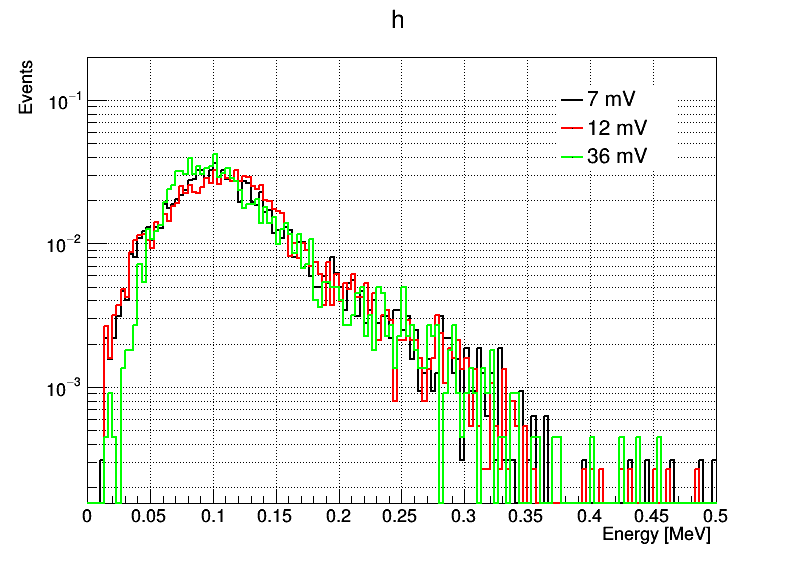

In [42]:
channel = [0,2]
legend = ['DUT', 'tag']
# legend = []
c = rt.TCanvas('c_spectrum', 'c_spectrum', 800, 600)
rt.gStyle.SetOptStat(00)
# rt.gStyle.SetOptFit(000002200)
# rt.gStyle.SetTitleSize(0.8)
leg = rt.TLegend(0.7,0.7,0.85,0.85)
leg.SetTextSize(0.04)
# leg = rt.TLegend(0.2,0.8,0.4,0.88)
h = {}
leg.SetBorderSize(0)
bins = [50,0,1]






for i, k in enumerate(integral.keys()):
    cond_t = np.abs(t_15[k][0]-t_15[k][2])<0.5
    cond = np.logical_and(cond_t, integral[k][2]>0.4)
    h[k] = create_TH1D(integral[k][0][cond], binning = [150,0,0.5],axis_title = ['Energy [MeV]', 'Events'])
    h[k].SetLineColor(i+1)
    h[k].SetLineWidth(2)
    print(h[k].Integral())
    h[k].Scale(1./h[k].Integral())
    h[k].SetMaximum(0.2)
    leg.AddEntry(h[k],threshold[k])
    h[k].DrawCopy('hist' if i == 0 else 'hist same')



leg.Draw()
c.SetLeftMargin(0.11)
c.SetBottomMargin(0.12)


c.SetLogy()
c.SetGrid()
c.Draw()



# energy amplitude correlation

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_spectrum
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


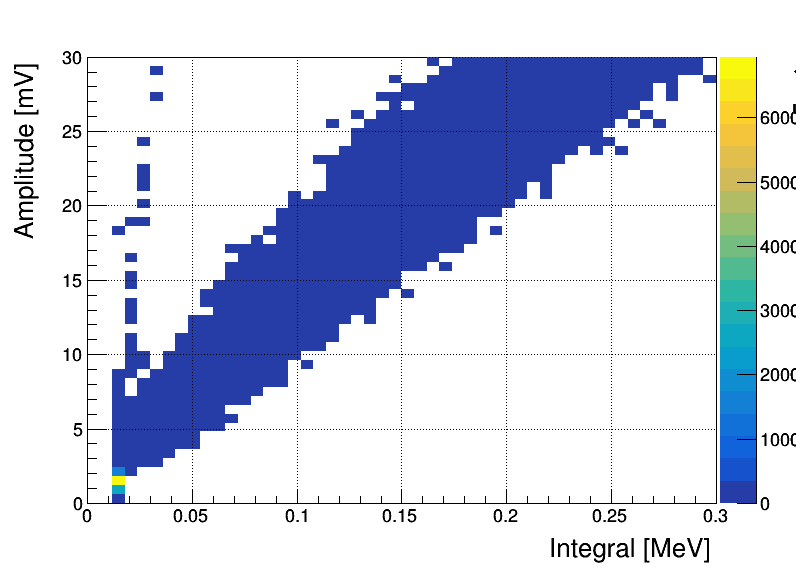

In [6]:
channel = [0,2]
legend = ['DUT', 'tag']
c = rt.TCanvas('c_spectrum', 'c_spectrum', 800, 600)
rt.gStyle.SetOptStat(0)
# rt.gStyle.SetOptFit(000002200)
# rt.gStyle.SetTitleSize(0.8)
leg = rt.TLegend(0.75,0.8,0.9,0.9)
leg = rt.TLegend(0.2,0.8,0.4,0.88)

leg.SetBorderSize(0)
sum_temp = integral[0]+ integral[2]
# cond = np.logical_and((time[0]-time[2])<50, (time[0]-time[2])>-50)

cond = np.logical_and((t_15[0]-t_15[2])<2, (t_15[0]-t_15[2])>-2)
# time_cut = 0.2
# cond = np.logical_and((t_15[0]-t_15[2])<0.2, (t_15[0]-t_15[2])>-0.2)

# cond = np.logical_and(cond, np.abs(sum_temp-0.686)<0.05)



# cond = np.logical_and(cond,np.logical_and(sum_temp>0.6, sum_temp<0.7))
# cond = np.logical_and((t_15[0]-t_15[2])<2.5, (t_15[0]-t_15[2])>1.5)

h = create_TH2D(np.column_stack((integral[0][cond], amplitude[0][cond])), binning = [50,0,0.3,50,0,30],\
                axis_title = ['Integral [MeV]','Amplitude [mV]', 'Events'])
# h = create_TH2D(np.column_stack((integral[2][cond], amplitude[2][cond])), binning = [50,0,1.5,50,0,200],\
#                 axis_title = ['Integral [MeV]','Amplitude [mV]', 'Events'])# h = create_TH2D(np.column_stack((integral[0], integral[2])), binning = [50,0,1.5,50,0,1.5],axis_title = ['DUT [MeV]','tag [MeV]', 'Events'])

# h = h.ProfileX()
h.GetYaxis().SetTitleSize(0.05)
h.GetXaxis().SetTitleSize(0.05)

h.SetTitle('')
# h = create_TH2D(np.column_stack(((t_15[0]-t_15[2])[cond], (t_45[0]-t_45[2])[cond])), binning = [50,-10,10,50,-10,10],axis_title = ['15','75', 'Events'])


h.DrawCopy('colz')
c.SetLeftMargin(0.11)
c.SetBottomMargin(0.12)


# c.SetLogz()
c.SetGrid()
c.Draw()
# c.SaveAs(plot_path+'2d_correlation.png')